/Users/yuan/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


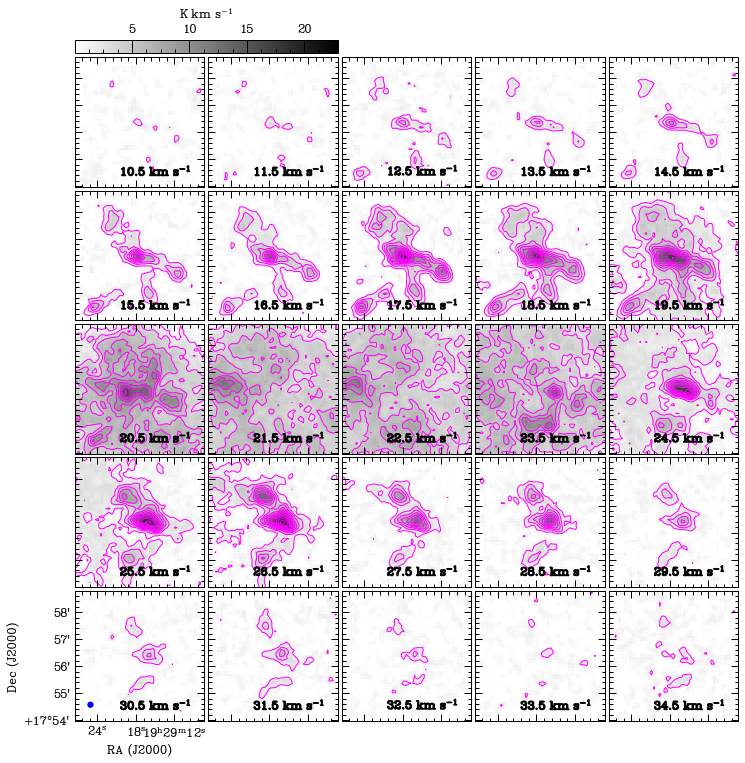

In [11]:
%matplotlib inline
import numpy as np 
import aplpy as ap 
import matplotlib as mpl 
from astropy import units as u 
from matplotlib import pyplot as plt
from spectral_cube import SpectralCube as sc
import matplotlib.patheffects as path_effects
mpl.rc("font", family="serif", size=14)
mpl.rc("axes", linewidth = 1)
mpl.rc("lines", linewidth = 1)
mpl.rc("xtick.major", pad = 5, width = 1)
mpl.rc("ytick.major", pad = 5, width = 1)
mpl.rc("xtick.minor", width = 1)
mpl.rc("ytick.minor", width = 1)

cubeFile = './CO3-2_cut.fits'
figout = './co_channel_maps'
cubeRaw = sc.read(cubeFile)

ra0, dec0 = 292.32274, 17.939734 

cube = cubeRaw.with_spectral_unit(u.km / u.s)

cubeRaw = sc.read(cubeFile)

ra0, dec0 = 292.32274, 17.939734 
BMIN    =    14.0/3600.0                                                        
BMAJ    =    14.0/3600.0                                             
BPA     =    67.9875946045 

cube = cubeRaw.with_spectral_unit(u.km / u.s)
vmin = 10
vmax = 35
rows = 5
cols = 5
dVel = (vmax-vmin)/rows/cols

# Determine the maximum and minimum values
m0Max =[]
m0Min =[]
for iv in range(rows*cols):
    vlower = vmin+iv*dVel
    vupper = vmin+iv*dVel+dVel
    slab = cube.spectral_slab(vlower * u.km/u.s, 
        vupper * u.km/u.s)
    m0   = slab.moment0()
    validM0 = m0.value[np.where(m0.value == m0.value)]
    m0Min = m0Min+[validM0.min()]
    m0Max = m0Max+[validM0.max()]

# Determine the rms 
slab = cube.spectral_slab(vmin*u.km/u.s, (vmin+dVel)*u.km/u.s)
m0  = slab.moment0()
validM0 = m0.value[np.where(m0.value == m0.value)]
rms = validM0.std()
levelMax = np.int(np.max(m0Max)/rms)
levelStep = (levelMax-10)/15
#levels = np.linspace(5,levelMax,levelStep)*rms
levels = np.linspace(3,66,19)*rms

fig = plt.figure(1, figsize=(18, 18))
iv = 0
for i in range(rows):
    for j in range(cols):
        vlower = vmin+iv*dVel
        vupper = vmin+iv*dVel+dVel
        vcenter = np.mean([vlower,vupper])
        vLabel = '%.1f'%vcenter+' km s$^{-1}}$'
        slab = cube.spectral_slab(vlower * u.km/u.s, 
                                  vupper * u.km/u.s)
        m0   = slab.moment0()
        subplot = [0.2+j*0.103,0.2+(rows-1-i)*0.103, 0.1, 0.1]
        fb = ap.FITSFigure(m0.hdu,figure = fig, 
                           subplot = subplot, aspect = 'auto')
        fb.recenter(ra0, dec0, radius = 2.4/60)
        fb.show_colorscale(vmin = 0, vmax = np.max(m0Max), cmap = 'gray_r', 
                           stretch = 'linear')
        fb.show_contour(m0.hdu, levels = levels, colors =  'magenta', linewidth = 0.8)
        fb.add_label(0.9, 1-0.88, vLabel, relative = True,
                     horizontalalignment='right', 
                     path_effects = ([path_effects.PathPatchEffect(offset=(0.5, -0.5), 
                                                                       facecolor='black'),
                                          path_effects.PathPatchEffect(edgecolor='black', 
                                                                       linewidth=0.2,
                                                                       facecolor='black')]))
        fb.tick_labels.set_xformat("hhmmss")
        fb.tick_labels.set_yformat("ddmm")
        fb.ticks.set_xspacing(6*15/3600.0)
        #fb.ticks.set_xspacing(2.0/60.0)
        fb.ticks.set_color('black')
        fb.hide_tick_labels()
        fb.hide_axis_labels()
        if j == 0 and i == rows - 1:
            fb.show_axis_labels()
            fb.show_tick_labels()
            fb.add_beam(major = BMAJ, minor = BMIN, angle = BPA,
                       fc = 'blue')
        iv = iv + 1
fb.add_colorbar(box = [0.2,0.2+(rows)*0.103, 0.203, 0.01], 
                ticks = [5,10,15,20], 
                box_orientation = "horizontal", location = 'top', 
                axis_label_text = "K km s$^{-1}$")
plt.savefig(figout+'.eps', bbox_inches='tight',
            papertype='a2')
plt.savefig(figout+'.pdf', bbox_inches='tight',
            papertype='a2')
plt.savefig(figout+'.png', bbox_inches='tight',
            papertype='a2')
